# CSSEGISandData/COVID-19
* Johns Hopkins UniversityのGitHubからCOVID-19の感染者数のデータを取得
* 累積感染者数、新規感染者数、死者数、回復者数、現行感染者数の国別データをExcelファイルで出力
* Update frequency
** Files after Feb 1 (UTC): once a day around 23:59 (UTC).

https://github.com/CSSEGISandData/COVID-19

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

## Confirmed Global（累積感染者数）

In [2]:
confirmed = pd.read_csv(
    'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,40,40,74,84,94,110,110,120,170,174
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,201,230,264,302,367,409,454,511,584,716
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7


In [4]:
confirmed.loc[confirmed[confirmed['Province/State'] == 'Hong Kong'].index,'Country/Region'] = 'Hong Kong'

In [5]:
confirmed.loc[confirmed[confirmed['Province/State'] == 'Macau'].index,'Country/Region'] = 'Macau'

In [6]:
confirmed_df = confirmed.groupby('Country/Region').sum().drop(['Lat','Long'],axis=1)

In [7]:
confirmed_df.columns = pd.to_datetime(confirmed_df.columns,format='%m/%d/%y').strftime('%Y-%m-%d')

In [8]:
confirmed_df.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,40,74,84,94,110,110,120,170,174
Albania,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243
Algeria,0,0,0,0,0,0,0,0,0,0,...,201,230,264,302,367,409,454,511,584,716
Andorra,0,0,0,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376
Angola,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7


In [9]:
confirmed_df.sort_values(confirmed_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_csv(
    'data/confirmed_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

## New Cases Global（新規感染者数）

In [10]:
new_cases = confirmed_df.diff(axis=1)

In [11]:
new_cases.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,0.0,34.0,10.0,10.0,16.0,0.0,10.0,50.0,4.0
Albania,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,15.0,19.0,23.0,28.0,12.0,11.0,15.0,11.0,20.0
Algeria,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62.0,29.0,34.0,38.0,65.0,42.0,45.0,57.0,73.0,132.0
Andorra,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,20.0,31.0,24.0,36.0,43.0,41.0,26.0,36.0,6.0
Angola,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0


In [12]:
new_cases.sort_values(new_cases.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_csv(
    'data/new_cases_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

## Deaths Global（累積死者数）

In [13]:
deaths = pd.read_csv(
    'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [14]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,2,4,4,4,4,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,4,5,5,6,8,10,10,11,15
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,17,17,19,21,25,26,29,31,35,44
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,3,3,3,6,8,12
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2


In [15]:
deaths.loc[deaths[deaths['Province/State'] == 'Hong Kong'].index,'Country/Region'] = 'Hong Kong'

In [16]:
deaths.loc[deaths[deaths['Province/State'] == 'Macau'].index,'Country/Region'] = 'Macau'

In [17]:
deaths_df = deaths.groupby('Country/Region').sum().drop(['Lat','Long'],axis=1)

In [18]:
deaths_df.columns = pd.to_datetime(deaths_df.columns,format='%m/%d/%y').strftime('%Y-%m-%d')

In [19]:
deaths_df.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,4,4,4,4,4,4
Albania,0,0,0,0,0,0,0,0,0,0,...,2,4,5,5,6,8,10,10,11,15
Algeria,0,0,0,0,0,0,0,0,0,0,...,17,17,19,21,25,26,29,31,35,44
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,3,3,3,6,8,12
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2


In [20]:
deaths_df.sort_values(deaths_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_csv(
    'data/deaths_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

## New Deaths Global（新規死者数）

In [21]:
new_deaths = deaths_df.diff(axis=1)

In [22]:
new_deaths.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
Albania,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0,4.0
Algeria,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,2.0,2.0,4.0,1.0,3.0,2.0,4.0,9.0
Andorra,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,2.0,4.0
Angola,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [23]:
new_deaths.sort_values(new_deaths.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_csv(
    'data/new_deaths_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

## Recovered Global（回復者数）

In [24]:
recovered = pd.read_csv(
    'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [25]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,2,5
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,10,17,17,31,31,33,44,52
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,65,65,24,65,29,29,31,31,37,46
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,10,10
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
recovered.loc[recovered[recovered['Province/State'] == 'Hong Kong'].index,'Country/Region'] = 'Hong Kong'

In [27]:
recovered.loc[recovered[recovered['Province/State'] == 'Macau'].index,'Country/Region'] = 'Macau'

In [28]:
recovered_df = recovered.groupby('Country/Region').sum().drop(['Lat','Long'],axis=1)

In [29]:
recovered_df.columns = pd.to_datetime(recovered_df.columns,format='%m/%d/%y').strftime('%Y-%m-%d')

In [30]:
recovered_df.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,2,5
Albania,0,0,0,0,0,0,0,0,0,0,...,2,2,10,17,17,31,31,33,44,52
Algeria,0,0,0,0,0,0,0,0,0,0,...,65,65,24,65,29,29,31,31,37,46
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,10,10
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
recovered_df.sort_values(recovered_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_csv(
    'data/recovered_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

## New Recovered Global（新規回復者数）

In [32]:
new_recovered = recovered_df.diff(axis=1)

In [33]:
new_recovered.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
Albania,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,7.0,0.0,14.0,0.0,2.0,11.0,8.0
Algeria,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.0,0.0,-41.0,41.0,-36.0,0.0,2.0,0.0,6.0,9.0
Andorra,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
Angola,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
new_recovered.sort_values(new_recovered.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_csv(
    'data/new_recovered_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

## Compare DataFrame Shapes

In [35]:
confirmed_df.shape

(182, 70)

In [36]:
deaths_df.shape

(182, 70)

In [37]:
recovered_df.shape

(182, 70)

In [38]:
confirmed_df[~confirmed_df.index.isin(deaths_df.index)]

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
Country/Region,,,,,,,,,,,,,,,,,,,,,


In [39]:
confirmed_df[~confirmed_df.index.isin(recovered_df.index)]

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
Country/Region,,,,,,,,,,,,,,,,,,,,,


In [40]:
deaths_df[~deaths_df.index.isin(recovered_df.index)]

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
Country/Region,,,,,,,,,,,,,,,,,,,,,


## Active Global（現行感染者数）

In [41]:
active_df = confirmed_df - deaths_df - recovered_df

In [42]:
active_df.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,38,38,72,80,88,104,104,114,164,165
Albania,0,0,0,0,0,0,0,0,0,0,...,85,98,108,124,151,147,156,169,168,176
Algeria,0,0,0,0,0,0,0,0,0,0,...,119,148,221,216,313,354,394,449,512,626
Andorra,0,0,0,0,0,0,0,0,0,0,...,111,131,162,186,220,263,304,327,352,354
Angola,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,5,5,4


In [43]:
active_df.sort_values(active_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_csv(
    'data/active_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

## Active Global Change（現行感染者増減数）

In [44]:
active_change = active_df.diff(axis=1)

In [45]:
active_change.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.0,34.0,8.0,8.0,16.0,0.0,10.0,50.0,1.0
Albania,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,13.0,10.0,16.0,27.0,-4.0,9.0,13.0,-1.0,8.0
Algeria,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,29.0,73.0,-5.0,97.0,41.0,40.0,55.0,63.0,114.0
Andorra,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.0,20.0,31.0,24.0,34.0,43.0,41.0,23.0,25.0,2.0
Angola,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0


In [46]:
active_change.sort_values(active_change.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_csv(
    'data/active_change_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

## Summary

In [47]:
summary_df = pd.concat([confirmed_df.sum(),deaths_df.sum(),recovered_df.sum(),active_df.sum(),new_cases.sum().astype(int),
                      new_deaths.sum().astype(int),new_recovered.sum().astype(int),active_change.sum().astype(int)],axis=1)

In [48]:
summary_df.columns = ['confirmed','deaths','recovered','active','new cases','new deaths','new recovered','active change']

In [49]:
summary_df.sort_index(ascending=False).head()

,confirmed,deaths,recovered,active,new cases,new deaths,new recovered,active change
2020-03-31,857487,42107,178034,637346,75122,4525,13468,57129
2020-03-30,782365,37582,164566,580217,62248,3657,15484,43107
2020-03-29,720117,33925,149082,537110,59411,3273,9667,46471
2020-03-28,660706,30652,139415,490639,67415,3454,8500,55461
2020-03-27,593291,27198,130915,435178,63700,3228,8765,51707


In [50]:
summary_df.sort_index(ascending=False).to_csv(
    'data/summary_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

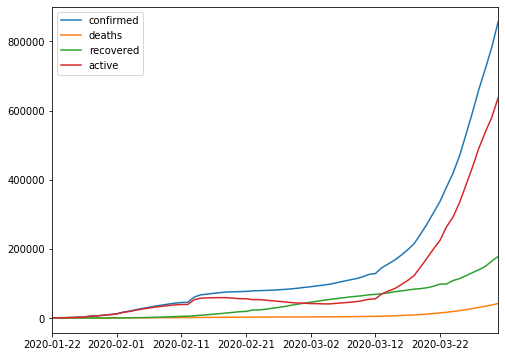

In [51]:
fig, ax = plt.subplots(figsize=(8,6))
summary_df[['confirmed','deaths','recovered','active']].plot(ax=ax)

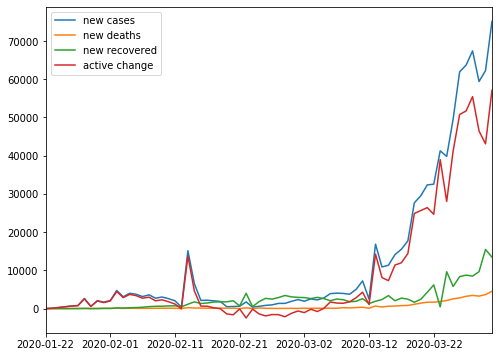

In [52]:
fig, ax = plt.subplots(figsize=(8,6))
summary_df[['new cases','new deaths','new recovered','active change']].plot(ax=ax)

## Excel Output

* 国名、項目名を日本語に変換

In [53]:
codes = pd.read_csv(
    'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv')

In [54]:
codes.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,Afghanistan
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,Albania
2,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,Algeria
3,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,Andorra
4,24,AO,AGO,24.0,NaN,NaN,NaN,Angola,-11.20270,17.873900,Angola


In [55]:
countries = pd.read_csv('countries.csv')

In [56]:
countries.head()

,Country,Japanese,Code,Region
0,Afghanistan,アフガニスタン,AF,Asia
1,Albania,アルバニア,AL,Europe
2,Algeria,アルジェリア,DZ,Africa
3,Andorra,アンドラ,AD,Europe
4,Angola,アンゴラ,AO,Africa


In [57]:
confirmed_df.index = confirmed_df.index.map(countries.set_index('Country').Japanese.to_dict())

In [58]:
new_cases.index = new_cases.index.map(countries.set_index('Country').Japanese.to_dict())

In [59]:
deaths_df.index = deaths_df.index.map(countries.set_index('Country').Japanese.to_dict())

In [60]:
new_deaths.index = new_deaths.index.map(countries.set_index('Country').Japanese.to_dict())

In [61]:
recovered_df.index = recovered_df.index.map(countries.set_index('Country').Japanese.to_dict())

In [62]:
new_recovered.index = new_recovered.index.map(countries.set_index('Country').Japanese.to_dict())

In [63]:
active_df.index = active_df.index.map(countries.set_index('Country').Japanese.to_dict())

In [64]:
active_change.index = active_change.index.map(countries.set_index('Country').Japanese.to_dict())

In [65]:
summary_df.columns = ['累積感染者数','累積死者数','累積回復者数','現行感染者数','新規感染者数','新規死者数','新規回復者数','現行感染者増減数']

In [66]:
with pd.ExcelWriter('covid19_'+datetime.today().strftime('%Y%m%d')+'.xlsx') as writer:
    summary_df.sort_index(ascending=False).to_excel(writer,sheet_name='一覧')
    confirmed_df.sort_values(confirmed_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_excel(
        writer, sheet_name='累積感染者数')
    deaths_df.sort_values(deaths_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_excel(
        writer,sheet_name='累積死者数')
    recovered_df.sort_values(recovered_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_excel(
        writer,sheet_name='累積回復者数')
    active_df.sort_values(active_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_excel(
        writer,sheet_name='現行感染者数')
    new_cases.sort_values(new_cases.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_excel(
        writer,sheet_name='新規感染者数')
    new_deaths.sort_values(new_deaths.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_excel(
        writer,sheet_name='新規死者数')
    new_recovered.sort_values(new_recovered.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_excel(
        writer,sheet_name='新規回復者数')
    active_change.sort_values(active_change.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_excel(
        writer,sheet_name='現行感染者増減数')

## Country Summary

In [67]:
latest = pd.concat([confirmed_df[[confirmed_df.columns[-1]]],
                    new_cases[[new_cases.columns[-1]]].astype(int),
                    deaths_df[[deaths_df.columns[-1]]],
                    new_deaths[[new_deaths.columns[-1]]].astype(int),
                    recovered_df[[recovered_df.columns[-1]]],
                    new_recovered[[new_recovered.columns[-1]]].astype(int),
                    active_df[[active_df.columns[-1]]],
                    active_change[[active_change.columns[-1]]].astype(int)],axis=1)

In [68]:
latest.columns = ['累積感染者数','新規感染者数','累積死者数','新規死者数','累積回復者数','新規回復者数','現行感染者数','現行感染者増減数']

In [69]:
latest.sort_values('累積感染者数',ascending=False).head()

,累積感染者数,新規感染者数,累積死者数,新規死者数,累積回復者数,新規回復者数,現行感染者数,現行感染者増減数
Country/Region,,,,,,,,
米国,188172,26365,3873,895,7024,1380,177275,24090
イタリア,105792,4053,12428,837,15729,1109,77635,2107
スペイン,95923,7967,8464,748,19259,2479,68200,4740
中国,81524,46,3305,1,76068,278,2151,-233
ドイツ,71808,4923,775,130,16100,2600,54933,2193


## Regional Summary

In [70]:
confirmed_df.index = confirmed_df.index.map(countries.set_index('Japanese').Region.to_dict())

In [71]:
confirmed_df.groupby('Country/Region').sum()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
Country/Region,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,0,0,0,0,0,0,0,0,...,1437,1818,2250,2773,3326,3885,4225,4786,5196,5781
Asia,554,653,937,1429,2105,2912,5558,6139,8204,9885,...,118308,120617,123340,126652,130228,134420,139047,143475,147867,152739
Cruise Liner,0,0,0,0,0,0,0,0,0,0,...,712,712,712,712,712,712,714,714,714,714
Europe,0,0,2,3,3,4,8,10,10,18,...,169984,195464,219141,248874,283911,319556,356186,385644,416631,451870
Latin America,0,0,0,0,0,0,0,0,0,0,...,5205,6204,7172,8273,9758,11317,13113,14640,15999,18758
Middle East,0,0,0,0,0,0,0,4,4,4,...,4908,5697,6696,8765,10679,13545,16270,19188,21797,25714
Northern America,1,1,2,2,6,6,7,7,7,11,...,34745,45935,56530,69029,87878,106339,127054,147166,169205,196699
Oceania,0,0,0,0,4,5,5,6,9,9,...,1654,1788,2204,2575,3099,3517,4097,4504,4956,5212


In [72]:
new_cases.index = new_cases.index.map(countries.set_index('Japanese').Region.to_dict())

In [73]:
new_cases.groupby('Country/Region').sum().astype(int)

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
Country/Region,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,0,0,0,0,0,0,0,0,...,265,381,432,523,553,559,340,561,410,585
Asia,0,99,284,492,676,807,2646,581,2065,1681,...,2099,2309,2723,3312,3576,4192,4627,4428,4392,4872
Cruise Liner,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
Europe,0,0,2,1,0,1,4,2,0,8,...,19137,25480,23677,29733,35037,35645,36630,29458,30987,35239
Latin America,0,0,0,0,0,0,0,0,0,0,...,1461,999,968,1101,1485,1559,1796,1527,1359,2759
Middle East,0,0,0,0,0,0,0,4,0,0,...,1087,789,999,2069,1914,2866,2725,2918,2609,3917
Northern America,0,0,1,0,4,0,1,0,0,4,...,7979,11190,10595,12499,18849,18461,20715,20112,22039,27494
Oceania,0,0,0,0,4,1,0,1,3,0,...,529,134,416,371,524,418,580,407,452,256


In [74]:
deaths_df.index = deaths_df.index.map(countries.set_index('Japanese').Region.to_dict())

In [75]:
deaths_df.groupby('Country/Region').sum()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
Country/Region,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,0,0,0,0,0,0,0,0,...,48,57,64,73,91,115,134,152,173,200
Asia,17,18,26,42,56,82,131,133,171,213,...,5214,5360,5514,5684,5896,6080,6269,6437,6599,6788
Cruise Liner,0,0,0,0,0,0,0,0,0,0,...,8,8,10,10,10,10,10,10,10,10
Europe,0,0,0,0,0,0,0,0,0,0,...,8809,10335,12094,14178,16396,18958,21668,24205,27040,30266
Latin America,0,0,0,0,0,0,0,0,0,0,...,66,85,115,144,175,215,277,342,403,507
Middle East,0,0,0,0,0,0,0,0,0,0,...,61,71,88,112,142,172,193,231,281,343
Northern America,0,0,0,0,0,0,0,0,0,0,...,438,582,732,972,1247,1635,2087,2531,3058,3974
Oceania,0,0,0,0,0,0,0,0,0,0,...,7,7,8,8,13,13,14,17,18,19


In [76]:
new_deaths.index = new_deaths.index.map(countries.set_index('Japanese').Region.to_dict())

In [77]:
new_deaths.groupby('Country/Region').sum().astype(int)

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
Country/Region,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,0,0,0,0,0,0,0,0,...,12,9,7,9,18,24,19,18,21,27
Asia,0,1,8,16,14,26,49,2,38,42,...,187,146,154,170,212,184,189,168,162,189
Cruise Liner,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
Europe,0,0,0,0,0,0,0,0,0,0,...,1318,1526,1759,2084,2218,2562,2710,2537,2835,3226
Latin America,0,0,0,0,0,0,0,0,0,0,...,23,19,30,29,31,40,62,65,61,104
Middle East,0,0,0,0,0,0,0,0,0,0,...,26,10,17,24,30,30,21,38,50,62
Northern America,0,0,0,0,0,0,0,0,0,0,...,112,144,150,240,275,388,452,444,527,916
Oceania,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,5,0,1,3,1,1


In [78]:
recovered_df.index = recovered_df.index.map(countries.set_index('Japanese').Region.to_dict())

In [79]:
recovered_df.groupby('Country/Region').sum()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
Country/Region,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,0,0,0,0,0,0,0,0,...,143,143,137,211,184,229,253,283,328,410
Asia,28,30,36,39,52,61,107,126,141,220,...,83898,84350,86550,88067,89840,91574,92962,94536,96953,98404
Cruise Liner,0,0,0,0,0,0,0,0,0,0,...,325,325,325,587,597,597,597,603,603,603
Europe,0,0,0,0,0,0,0,0,0,0,...,12795,12795,19756,23493,29623,36138,42612,48911,58307,66891
Latin America,0,0,0,0,0,0,0,0,0,0,...,44,44,110,121,150,207,243,260,686,1166
Middle East,0,0,0,0,0,0,0,0,0,0,...,418,418,537,623,692,814,916,1058,1259,1512
Northern America,0,0,0,0,0,0,0,0,0,0,...,188,188,458,544,865,1125,1538,3131,6110,8616
Oceania,0,0,0,0,0,0,0,0,2,2,...,88,88,127,141,199,231,294,300,320,432


In [80]:
new_recovered.index = new_recovered.index.map(countries.set_index('Japanese').Region.to_dict())

In [81]:
new_recovered.groupby('Country/Region').sum().astype(int)

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
Country/Region,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,0,0,0,0,0,0,0,0,...,54,0,-6,74,-27,45,24,30,45,82
Asia,0,2,6,3,13,9,46,19,15,79,...,2220,452,2200,1517,1773,1734,1388,1574,2417,1451
Cruise Liner,0,0,0,0,0,0,0,0,0,0,...,0,0,0,262,10,0,0,6,0,0
Europe,0,0,0,0,0,0,0,0,0,0,...,3799,0,6961,3737,6130,6515,6474,6299,9396,8584
Latin America,0,0,0,0,0,0,0,0,0,0,...,19,0,66,11,29,57,36,17,426,480
Middle East,0,0,0,0,0,0,0,0,0,0,...,51,0,119,86,69,122,102,142,201,253
Northern America,0,0,0,0,0,0,0,0,0,0,...,2,0,270,86,321,260,413,1593,2979,2506
Oceania,0,0,0,0,0,0,0,0,2,0,...,62,0,39,14,58,32,63,6,20,112


In [82]:
active_df.index = active_df.index.map(countries.set_index('Japanese').Region.to_dict())

In [83]:
active_df.groupby('Country/Region').sum()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
Country/Region,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,0,0,0,0,0,0,0,0,...,1246,1618,2049,2489,3051,3541,3838,4351,4695,5171
Asia,509,605,875,1348,1997,2769,5320,5880,7892,9452,...,29196,30907,31276,32901,34492,36766,39816,42502,44315,47547
Cruise Liner,0,0,0,0,0,0,0,0,0,0,...,379,379,377,115,105,105,107,101,101,101
Europe,0,0,2,3,3,4,8,10,10,18,...,148380,172334,187291,211203,237892,264460,291906,312528,331284,354713
Latin America,0,0,0,0,0,0,0,0,0,0,...,5095,6075,6947,8008,9433,10895,12593,14038,14910,17085
Middle East,0,0,0,0,0,0,0,4,4,4,...,4429,5208,6071,8030,9845,12559,15161,17899,20257,23859
Northern America,1,1,2,2,6,6,7,7,7,11,...,34119,45165,55340,67513,85766,103579,123429,141504,160037,184109
Oceania,0,0,0,0,4,5,5,6,7,7,...,1559,1693,2069,2426,2887,3273,3789,4187,4618,4761


In [84]:
active_change.index = active_change.index.map(countries.set_index('Japanese').Region.to_dict())

In [85]:
active_change.groupby('Country/Region').sum().astype(int)

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
Country/Region,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,0,0,0,0,0,0,0,0,...,199,372,431,440,562,490,297,513,344,476
Asia,0,96,270,473,649,772,2551,560,2012,1560,...,-308,1711,369,1625,1591,2274,3050,2686,1813,3232
Cruise Liner,0,0,0,0,0,0,0,0,0,0,...,0,0,-2,-262,-10,0,2,-6,0,0
Europe,0,0,2,1,0,1,4,2,0,8,...,14020,23954,14957,23912,26689,26568,27446,20622,18756,23429
Latin America,0,0,0,0,0,0,0,0,0,0,...,1419,980,872,1061,1425,1462,1698,1445,872,2175
Middle East,0,0,0,0,0,0,0,4,0,0,...,1010,779,863,1959,1815,2714,2602,2738,2358,3602
Northern America,0,0,1,0,4,0,1,0,0,4,...,7865,11046,10175,12173,18253,17813,19850,18075,18533,24072
Oceania,0,0,0,0,4,1,0,1,1,0,...,467,134,376,357,461,386,516,398,431,143


In [86]:
region_summary = pd.concat([confirmed_df.groupby('Country/Region').sum().iloc[:,-1],
                            new_cases.groupby('Country/Region').sum().astype(int).iloc[:,-1],
                            deaths_df.groupby('Country/Region').sum().iloc[:,-1],
                            new_deaths.groupby('Country/Region').sum().astype(int).iloc[:,-1],
                            recovered_df.groupby('Country/Region').sum().iloc[:,-1],
                            new_recovered.groupby('Country/Region').sum().astype(int).iloc[:,-1],
                            active_df.groupby('Country/Region').sum().iloc[:,-1],
                            active_change.groupby('Country/Region').sum().astype(int).iloc[:,-1]],axis=1)

In [87]:
region_summary

,2020-03-31,2020-03-31,2020-03-31,2020-03-31,2020-03-31,2020-03-31,2020-03-31,2020-03-31
Country/Region,,,,,,,,
Africa,5781,585,200,27,410,82,5171,476
Asia,152739,4872,6788,189,98404,1451,47547,3232
Cruise Liner,714,0,10,0,603,0,101,0
Europe,451870,35239,30266,3226,66891,8584,354713,23429
Latin America,18758,2759,507,104,1166,480,17085,2175
Middle East,25714,3917,343,62,1512,253,23859,3602
Northern America,196699,27494,3974,916,8616,2506,184109,24072
Oceania,5212,256,19,1,432,112,4761,143


In [88]:
region_summary.columns = [
    '累積感染者数','新規感染者数','累積死者数','新規死者数','累積回復者数','新規回復者数','現行感染者数','現行感染者増減数']

In [89]:
region_summary.index = ['アフリカ','アジア','クルーズ船','欧州','南米','中東','北米','オセアニア']

In [90]:
region_summary

,累積感染者数,新規感染者数,累積死者数,新規死者数,累積回復者数,新規回復者数,現行感染者数,現行感染者増減数
アフリカ,5781,585,200,27,410,82,5171,476
アジア,152739,4872,6788,189,98404,1451,47547,3232
クルーズ船,714,0,10,0,603,0,101,0
欧州,451870,35239,30266,3226,66891,8584,354713,23429
南米,18758,2759,507,104,1166,480,17085,2175
中東,25714,3917,343,62,1512,253,23859,3602
北米,196699,27494,3974,916,8616,2506,184109,24072
オセアニア,5212,256,19,1,432,112,4761,143


In [91]:
region_summary.append(region_summary.sum().rename('世界')).sort_values('累積感染者数',ascending=False)

,累積感染者数,新規感染者数,累積死者数,新規死者数,累積回復者数,新規回復者数,現行感染者数,現行感染者増減数
世界,857487,75122,42107,4525,178034,13468,637346,57129
欧州,451870,35239,30266,3226,66891,8584,354713,23429
北米,196699,27494,3974,916,8616,2506,184109,24072
アジア,152739,4872,6788,189,98404,1451,47547,3232
中東,25714,3917,343,62,1512,253,23859,3602
南米,18758,2759,507,104,1166,480,17085,2175
アフリカ,5781,585,200,27,410,82,5171,476
オセアニア,5212,256,19,1,432,112,4761,143
クルーズ船,714,0,10,0,603,0,101,0


In [92]:
with pd.ExcelWriter('covid19_summary_'+datetime.today().strftime('%Y%m%d')+'.xlsx') as writer:
    region_summary.append(region_summary.sum().rename('世界')).sort_values('累積感染者数',ascending=False).to_excel(
    writer,sheet_name='地域別')
    latest.sort_values('累積感染者数',ascending=False).to_excel(writer,sheet_name='各国別')